In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('test.csv')
df1 = pd.read_csv('autoru2.csv')

In [3]:
pd.options.display.max_columns = 30

In [4]:
df1 = df1[0:7400]

In [5]:
df.drop(['vehicleConfiguration','description','name', 'brand', 'id'], axis = 1, inplace = True)

In [6]:
df1.drop(['Unnamed: 0', 'image', 'vehicleConfiguration','name', 'brand','availability','url', 'fuelType.1','name1','name2','priceCurrency'], axis = 1, inplace = True)

In [7]:
df.head()

,bodyType,color,fuelType,modelDate,numberOfDoors,productionDate,vehicleTransmission,engineDisplacement,enginePower,mileage,Комплектация,Привод,Руль,Состояние,Владельцы,ПТС,Таможня,Владение
0,седан,чёрный,дизель,2016.0,4.0,2017.0,автоматическая,2.0 LTR,190 N12,158836.0,"['[{""name"":""Безопасность"",""values"":[""Антипробу...",задний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,NaN
1,седан,белый,дизель,2018.0,4.0,2019.0,автоматическая,2.0 LTR,150 N12,10.0,"['[{""name"":""Комфорт"",""values"":[""Круиз-контроль...",задний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,NaN
2,седан,синий,бензин,2009.0,4.0,2012.0,автоматическая,4.4 LTR,407 N12,120000.0,"['[{""name"":""Комфорт"",""values"":[""Круиз-контроль...",полный,Левый,Не требует ремонта,2 владельца,Оригинал,Растаможен,7 лет и 2 месяца
3,внедорожник 5 дв.,белый,дизель,2014.0,5.0,2015.0,автоматическая,3.0 LTR,249 N12,111466.0,"['[{""name"":""Комфорт"",""values"":[""Круиз-контроль...",полный,Левый,Не требует ремонта,2 владельца,Оригинал,Растаможен,NaN
4,внедорожник 5 дв.,синий,дизель,2014.0,5.0,2019.0,автоматическая,3.0 LTR,381 N12,11891.0,"['[{""name"":""Комфорт"",""values"":[""Круиз-контроль...",полный,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,NaN


In [8]:
df1.head()

,bodyType,color,fuelType,modelDate,numberOfDoors,productionDate,vehicleTransmission,engineDisplacement,enginePower,kmage,Комплектация,Привод,Руль,Состояние,Владельцы,ПТС,Таможня,Владение,price
0,седан,красный,бензин,2011.0,4.0,2012.0,автоматическая,2.0 LTR,184 N12,113 000 км,NaN,задний,Левый,Не требует ремонта,2 владельца,Дубликат,Растаможен,NaN,1050000.0
1,седан,белый,бензин,2013.0,4.0,2014.0,автоматическая,2.0 LTR,184 N12,53 000 км,"['Круиз-контроль', 'Система «старт-стоп»', 'Эл...",задний,Левый,Не требует ремонта,2 владельца,Оригинал,Растаможен,NaN,1490000.0
2,седан,синий,бензин,2017.0,4.0,2018.0,автоматическая,4.4 LTR,625 N12,10 160 км,"['Круиз-контроль', 'Мультифункциональное рулев...",полный,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,1 год и 6 месяцев,7000000.0
3,внедорожник 5 дв.,серый,бензин,2006.0,5.0,2007.0,автоматическая,3.0 LTR,264 N12,250 000 км,NaN,полный,Левый,Не требует ремонта,3 или более,Оригинал,Растаможен,NaN,655000.0
4,седан,серый,бензин,1998.0,4.0,1999.0,автоматическая,4.4 LTR,286 N12,298 000 км,NaN,задний,Левый,Не требует ремонта,3 или более,Дубликат,Растаможен,NaN,490000.0


In [9]:
df1.drop(df1[df1.kmage.isna() == True].index, axis = 0, inplace = True)
df1['mileage'] = df1.kmage.apply(lambda x: round(float(x[0:-7]+x[-6:-3])*0.62137))
df1.drop(['kmage'], axis = 1, inplace = True)

In [10]:
df.drop(['Комплектация'], axis = 1, inplace = True)
df1.drop(['Комплектация'], axis = 1, inplace = True)

In [11]:
df.engineDisplacement = df.engineDisplacement.apply(lambda x: x.split(' ')[0])
df1.engineDisplacement = df1.engineDisplacement.apply(lambda x: x.split(' ')[0])
df1.enginePower = df1.enginePower.apply(lambda x: x.split(' ')[0])
df.enginePower = df.enginePower.apply(lambda x: x.split(' ')[0])

In [12]:
df['Владение'].fillna(0, inplace = True)
df1['Владение'].fillna(0, inplace = True)

In [13]:
import re
def data_in_number(x):
    
    if x != 0:
        result = re.sub(r'[^0-9]', '', x)
        if len(result) != 1:
            a = result.replace('', '.')[1:-1].split('.')[0]
            b = round(float(result.replace('', '.')[1:-1].split('.')[1])/12, 2)
            return float(a)+float(b)
        else:
            return result
    
    

In [14]:
df1['Владение'] = df1['Владение'].apply(data_in_number)
df['Владение'] = df['Владение'].apply(data_in_number)
df['Владение'].fillna(0, inplace = True)
df1['Владение'].fillna(0, inplace = True)

In [15]:
df.shape

(3837, 17)

In [16]:
df1.shape

(7398, 18)

In [17]:
df['price'] = 0

In [18]:
data = pd.concat([df, df1],ignore_index = True)

C:\Users\bogac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11235 entries, 0 to 11234
Data columns (total 18 columns):
bodyType               11235 non-null object
color                  11235 non-null object
engineDisplacement     11235 non-null object
enginePower            11235 non-null object
fuelType               11235 non-null object
mileage                11235 non-null float64
modelDate              11235 non-null float64
numberOfDoors          11235 non-null float64
price                  11235 non-null float64
productionDate         11235 non-null float64
vehicleTransmission    11235 non-null object
Владельцы              11235 non-null object
Владение               11235 non-null object
ПТС                    11235 non-null object
Привод                 11235 non-null object
Руль                   11235 non-null object
Состояние              11235 non-null object
Таможня                11235 non-null object
dtypes: float64(5), object(13)
memory usage: 1.5+ MB


In [20]:
data.head()

,bodyType,color,engineDisplacement,enginePower,fuelType,mileage,modelDate,numberOfDoors,price,productionDate,vehicleTransmission,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
0,седан,чёрный,2.0,190,дизель,158836.0,2016.0,4.0,0.0,2017.0,автоматическая,1 владелец,0,Оригинал,задний,Левый,Не требует ремонта,Растаможен
1,седан,белый,2.0,150,дизель,10.0,2018.0,4.0,0.0,2019.0,автоматическая,1 владелец,0,Оригинал,задний,Левый,Не требует ремонта,Растаможен
2,седан,синий,4.4,407,бензин,120000.0,2009.0,4.0,0.0,2012.0,автоматическая,2 владельца,7.17,Оригинал,полный,Левый,Не требует ремонта,Растаможен
3,внедорожник 5 дв.,белый,3.0,249,дизель,111466.0,2014.0,5.0,0.0,2015.0,автоматическая,2 владельца,0,Оригинал,полный,Левый,Не требует ремонта,Растаможен
4,внедорожник 5 дв.,синий,3.0,381,дизель,11891.0,2014.0,5.0,0.0,2019.0,автоматическая,1 владелец,0,Оригинал,полный,Левый,Не требует ремонта,Растаможен


In [21]:
data.modelDate = data.modelDate.apply(lambda x: 2020 - int(x))
data.productionDate = data.productionDate.apply(lambda x: 2020 - int(x))

In [22]:
data.enginePower = data.enginePower.apply(lambda x: float(x))
data.engineDisplacement = data.engineDisplacement.apply(lambda x: float(x) if x != 'undefined' else 0)
data['Владение'] = data['Владение'].apply(lambda x: float(x))

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11235 entries, 0 to 11234
Data columns (total 18 columns):
bodyType               11235 non-null object
color                  11235 non-null object
engineDisplacement     11235 non-null float64
enginePower            11235 non-null float64
fuelType               11235 non-null object
mileage                11235 non-null float64
modelDate              11235 non-null int64
numberOfDoors          11235 non-null float64
price                  11235 non-null float64
productionDate         11235 non-null int64
vehicleTransmission    11235 non-null object
Владельцы              11235 non-null object
Владение               11235 non-null float64
ПТС                    11235 non-null object
Привод                 11235 non-null object
Руль                   11235 non-null object
Состояние              11235 non-null object
Таможня                11235 non-null object
dtypes: float64(6), int64(2), object(10)
memory usage: 1.5+ MB


In [24]:
num_feat = data.select_dtypes(exclude = ['O']).copy()
cat_feat = data.select_dtypes(include = ['O']).copy()

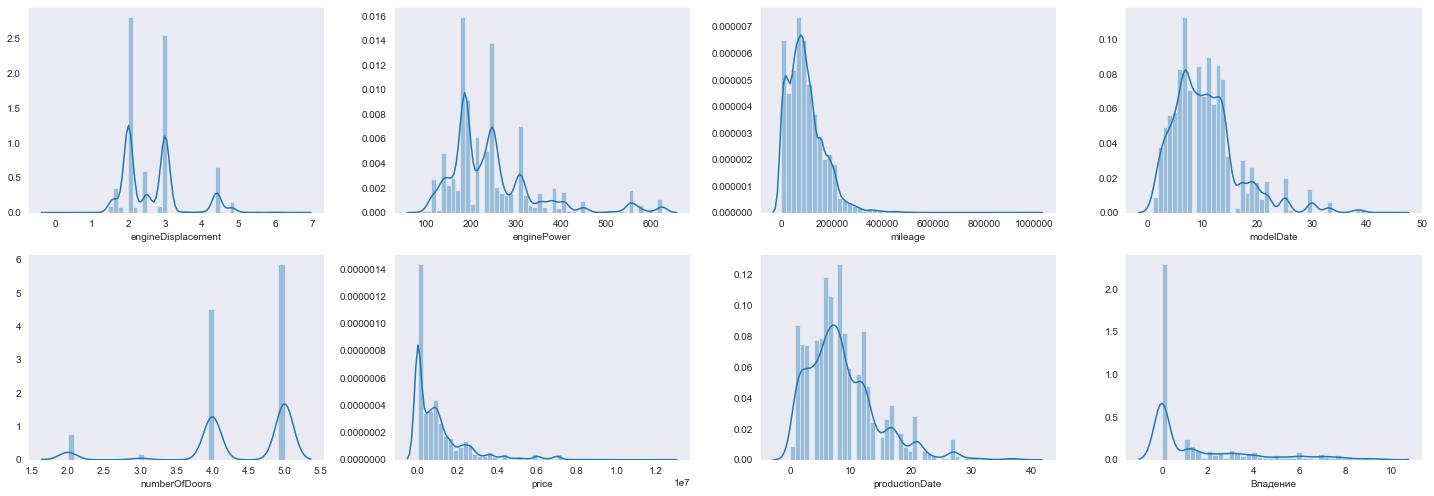

In [25]:
sns.set_style('dark')
fig = plt.figure(figsize = (20,10))
for index, col in enumerate(num_feat):
    plt.subplot(3,4, index+1)
    sns.distplot(num_feat.loc[:, col].dropna())
fig.tight_layout(pad = 1)

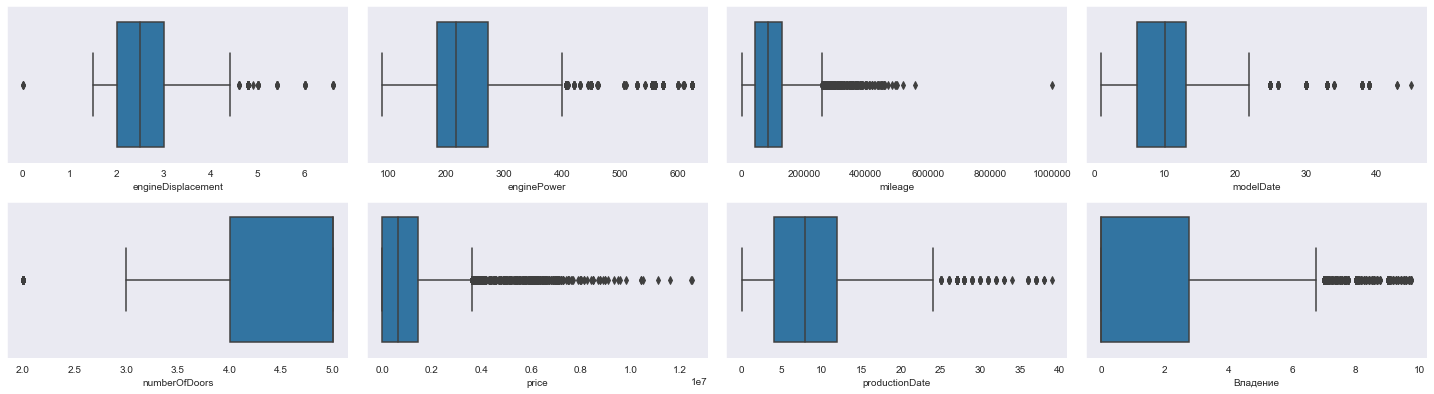

In [26]:
fig = plt.figure(figsize = (20,16))
for index, col in enumerate(num_feat):
    plt.subplot(6,4, index+1)
    sns.boxplot(num_feat.loc[:, col].dropna())
fig.tight_layout(pad = 1)

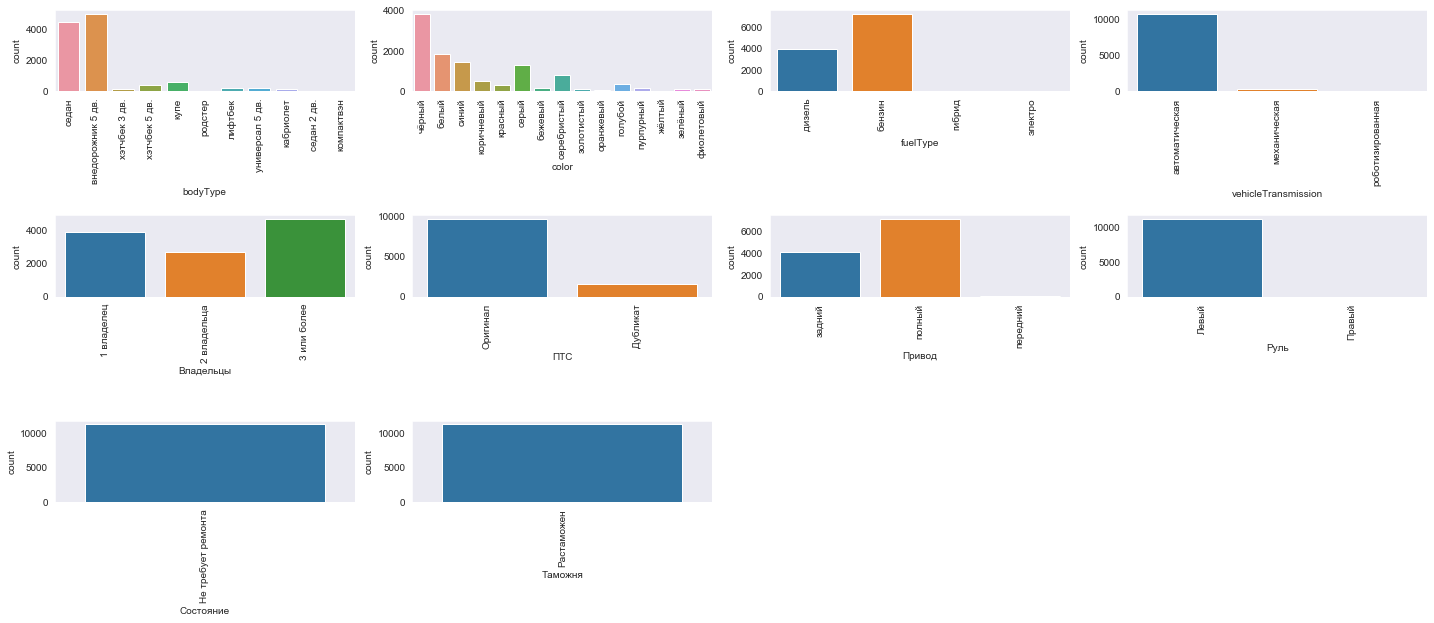

In [27]:
fig = plt.figure(figsize=(20,10))
for index in range(len(cat_feat.columns)):
    plt.subplot(4,4,index+1)
    sns.countplot(x=cat_feat.iloc[:,index], data=cat_feat.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

In [28]:
data.drop(['vehicleTransmission','Руль','Таможня','Состояние'], axis = 1, inplace = True)

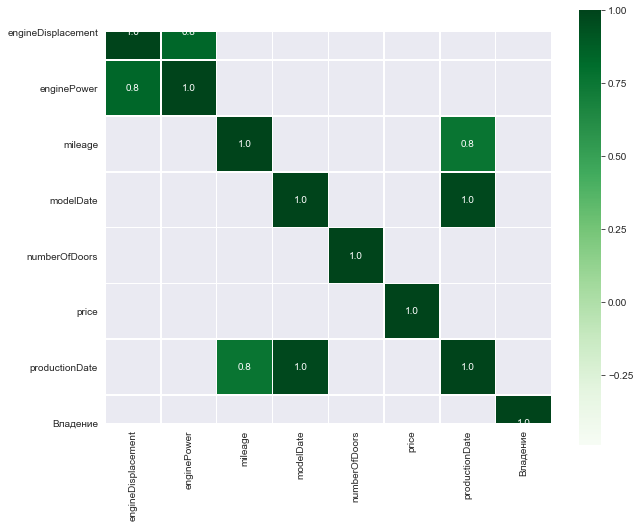

In [29]:
plt.figure(figsize=(10,8))
correlation = num_feat.corr()
sns.heatmap(correlation, square=True,
              annot=True, fmt=".1f", mask = correlation <0.75, linewidth=0.5, cmap='Greens')

In [30]:
data.drop(['modelDate'], axis = 1, inplace = True)

In [31]:
num_train = data.select_dtypes(exclude = ['O'])
num_feat_corr = abs(num_train.corr()['price']).sort_values(ascending = False)
num_feat_corr

price                 1.000000
mileage               0.491791
productionDate        0.435177
enginePower           0.378232
engineDisplacement    0.199166
Владение              0.041264
numberOfDoors         0.030690
Name: price, dtype: float64

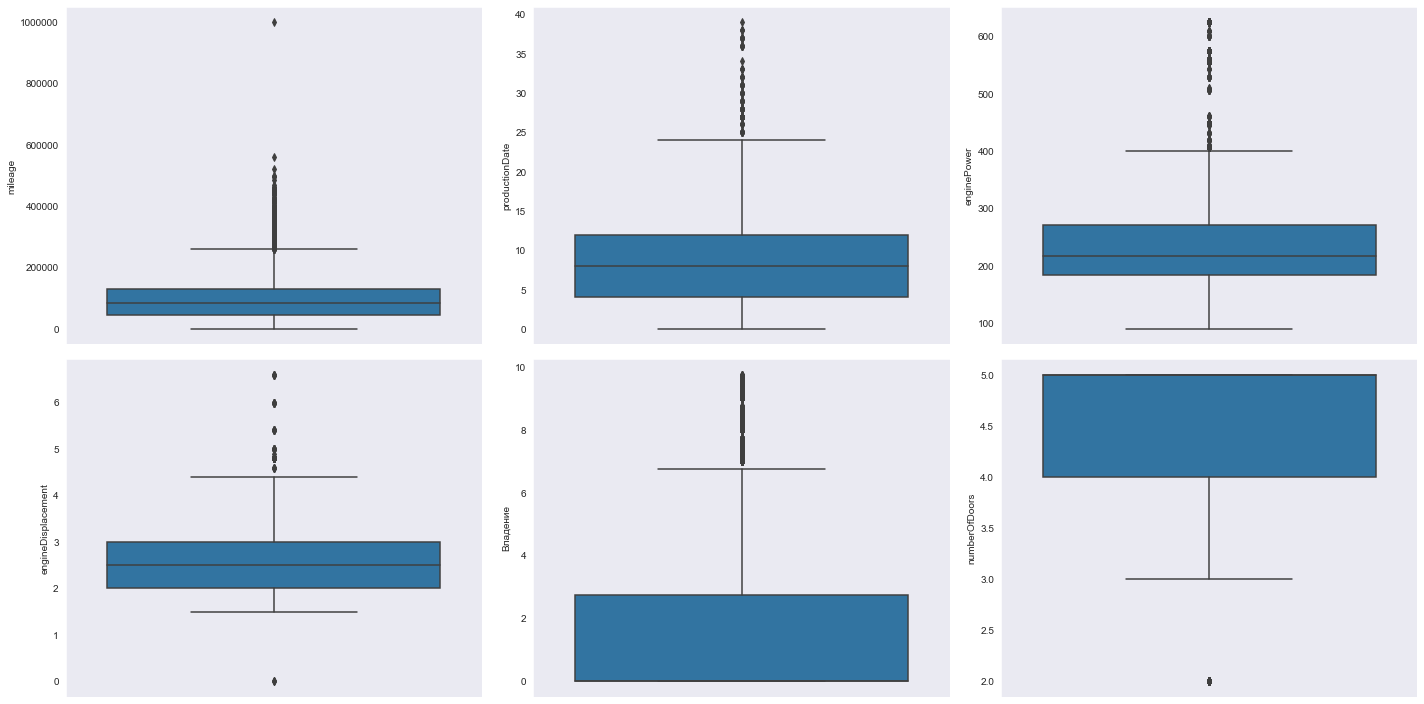

In [32]:
out_col = ['mileage','productionDate','enginePower','engineDisplacement','Владение', 'numberOfDoors']
fig = plt.figure(figsize=(20,10))
for index,col in enumerate(out_col):
    plt.subplot(2,3,index+1)
    sns.boxplot(y=col, data=data)
fig.tight_layout(pad=1.5)

In [33]:
data = pd.get_dummies(data)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11235 entries, 0 to 11234
Data columns (total 45 columns):
engineDisplacement            11235 non-null float64
enginePower                   11235 non-null float64
mileage                       11235 non-null float64
numberOfDoors                 11235 non-null float64
price                         11235 non-null float64
productionDate                11235 non-null int64
Владение                      11235 non-null float64
bodyType_внедорожник 5 дв.    11235 non-null uint8
bodyType_кабриолет            11235 non-null uint8
bodyType_компактвэн           11235 non-null uint8
bodyType_купе                 11235 non-null uint8
bodyType_лифтбек              11235 non-null uint8
bodyType_родстер              11235 non-null uint8
bodyType_седан                11235 non-null uint8
bodyType_седан 2 дв.          11235 non-null uint8
bodyType_универсал 5 дв.      11235 non-null uint8
bodyType_хэтчбек 3 дв.        11235 non-null uint8
bodyType_хэт

In [35]:
data1 = data.drop(['price'], axis = 1)

In [36]:
from sklearn.preprocessing import RobustScaler

cols = data1.select_dtypes(np.number).columns
data[cols] = RobustScaler().fit_transform(data[cols])

In [37]:
df.shape

(3837, 18)

In [61]:
data[3836:3839]

,engineDisplacement,enginePower,mileage,numberOfDoors,price,productionDate,Владение,bodyType_внедорожник 5 дв.,bodyType_кабриолет,bodyType_компактвэн,bodyType_купе,bodyType_лифтбек,bodyType_родстер,bodyType_седан,bodyType_седан 2 дв.,...,color_синий,color_фиолетовый,color_чёрный,fuelType_бензин,fuelType_гибрид,fuelType_дизель,fuelType_электро,Владельцы_1 владелец,Владельцы_2 владельца,Владельцы_3 или более,ПТС_Дубликат,ПТС_Оригинал,Привод_задний,Привод_передний,Привод_полный
3836,1.9,2.147727,0.072364,0.0,0.0,0.25,2.698182,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3837,-0.5,-0.386364,-0.156014,-1.0,1050000.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,1.0,0.0,-1.0
3838,-0.5,-0.386364,-0.588437,-1.0,1490000.0,-0.25,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.0


In [62]:
X = data[3837:].drop(['price'], axis = 1)
y = np.log(data[3837:]['price'])
x_test = data[:3837].drop(['price'], axis = 1)

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
model = RandomForestRegressor()

In [65]:
model.fit(X, y)

RandomForestRegressor()

In [66]:
y_pred = np.exp(model.predict(x_test))

In [67]:
y_real = pd.read_csv('sample_submission (2).csv')

In [68]:
y_real

,id,price
0,0,5299000.0
1,1,1580000.0
2,2,2000000.0
3,3,2199000.0
4,4,935000.0
...,...,...
3832,3832,969000.0
3833,3833,1750000.0
3834,3834,1100000.0
3835,3835,2939000.0


In [69]:
submission = pd.DataFrame({'Id': x_test.index, 'SalePrice': y_pred})

In [70]:
submission

,Id,SalePrice
0,0,1.688327e+06
1,1,2.423505e+06
2,2,1.026677e+06
3,3,2.048246e+06
4,4,4.775110e+06
...,...,...
3832,3832,1.086174e+06
3833,3833,2.484650e+06
3834,3834,4.496392e+05
3835,3835,1.027244e+06


In [71]:
submission.to_csv("submission.csv", index=False)

In [72]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [73]:
mape(y_real.price, y_pred)

1.0754112775349471

In [76]:
from catboost import CatBoostRegressor

In [79]:
model = CatBoostRegressor(#iterations = ITERATIONS,
                          #learning_rate = LR,
                          #random_seed = RANDOM_SEED,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE']
                         )
model.fit(X, y,
         #cat_features=cat_features_ids,
         eval_set=(x_test, y_real.price),
         verbose_eval=100,
         use_best_model=True,
         plot=True
         )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.067259
0:	learn: 0.0463166	test: 0.9999852	best: 0.9999852 (0)	total: 109ms	remaining: 1m 49s
100:	learn: 0.0070228	test: 0.9999852	best: 0.9999852 (12)	total: 342ms	remaining: 3.04s
200:	learn: 0.0057752	test: 0.9999852	best: 0.9999852 (12)	total: 556ms	remaining: 2.21s
300:	learn: 0.0051553	test: 0.9999852	best: 0.9999852 (12)	total: 769ms	remaining: 1.78s
400:	learn: 0.0047428	test: 0.9999852	best: 0.9999852 (12)	total: 971ms	remaining: 1.45s
500:	learn: 0.0044328	test: 0.9999852	best: 0.9999852 (12)	total: 1.17s	remaining: 1.17s
600:	learn: 0.0042210	test: 0.9999852	best: 0.9999852 (12)	total: 1.36s	remaining: 905ms
700:	learn: 0.0040192	test: 0.9999852	best: 0.9999852 (12)	total: 1.59s	remaining: 677ms
800:	learn: 0.0038387	test: 0.9999852	best: 0.9999852 (12)	total: 1.82s	remaining: 453ms
900:	learn: 0.0036984	test: 0.9999852	best: 0.9999852 (12)	total: 2.05s	remaining: 225ms
999:	learn: 0.0035534	test: 0.9999852	best: 0.9999852 (12)	total: 2.29s	remaining: